In [1]:
import re

import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import galstreams as gs
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
streams = gs.MWStreams()

Initializing galstreams library from master_log... 


In [3]:
streams.all_unique_stream_names()

array(['20.0-1', '300S', 'AAU-ATLAS', 'AAU-AliqaUma', 'ACS', 'Acheron',
       'Alpheus', 'Aquarius', 'C-19', 'C-4', 'C-5', 'C-7', 'C-8', 'Cetus',
       'Cetus-New', 'Cetus-Palca', 'Cocytos', 'Corvus', 'Elqui',
       'Eridanus', 'GD-1', 'Gaia-1', 'Gaia-10', 'Gaia-11', 'Gaia-12',
       'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5', 'Gaia-6', 'Gaia-7',
       'Gaia-8', 'Gaia-9', 'Gunnthra', 'Hermus', 'Hrid', 'Hyllus',
       'Indus', 'Jet', 'Jhelum-a', 'Jhelum-b', 'Kshir', 'Kwando', 'LMS-1',
       'Leiptr', 'Lethe', 'M2', 'M30', 'M5', 'M68-Fjorm', 'M92',
       'Molonglo', 'Monoceros', 'Murrumbidgee', 'NGC1261', 'NGC1851',
       'NGC2298', 'NGC288', 'NGC3201-Gjoll', 'NGC5466', 'NGC6362',
       'NGC6397', 'OmegaCen-Fimbulthul', 'Ophiuchus', 'Orinoco',
       'Orphan-Chenab', 'PS1-A', 'PS1-B', 'PS1-C', 'PS1-D', 'PS1-E',
       'Pal13', 'Pal15', 'Pal5', 'Palca', 'Parallel', 'Pegasus',
       'Perpendicular', 'Phlegethon', 'Phoenix', 'Ravi', 'Sagittarius',
       'Sangarius', 'Scamander', 'Sl

In [4]:
df = streams.summary
tbl = at.Table.from_pandas(df)
tbl = tbl[tbl["On"]]

Make some adjustments:

In [5]:
tbl[np.where(tbl["Name"] == "M2")[0][0]]["DiscoveryRefs"] = "Ibata2021"
tbl[np.where(tbl["Name"] == "NGC288")[0][0]]["DiscoveryRefs"] = "Ibata2021"

Convert discovery references to years:

In [9]:
pattr = re.compile("([21][09][0-9][0-9])")
tbl["DiscoveryYear"] = [int(re.search(pattr, x).group()) for x in tbl["DiscoveryRefs"]]
tbl.sort("DiscoveryYear")
tbl.write("../data/streams-discovery-year.csv", overwrite=True)

In [42]:
year_bins = np.arange(
    tbl["DiscoveryYear"].min() - 0.5, tbl["DiscoveryYear"].max() + 0.5 + 1e-3, 1
)
H, _ = np.histogram(tbl["DiscoveryYear"], bins=year_bins)
year_c = (0.5 * (year_bins[:-1] + year_bins[1:])).astype(int)

Text(0, 0.5, 'streams discovered')

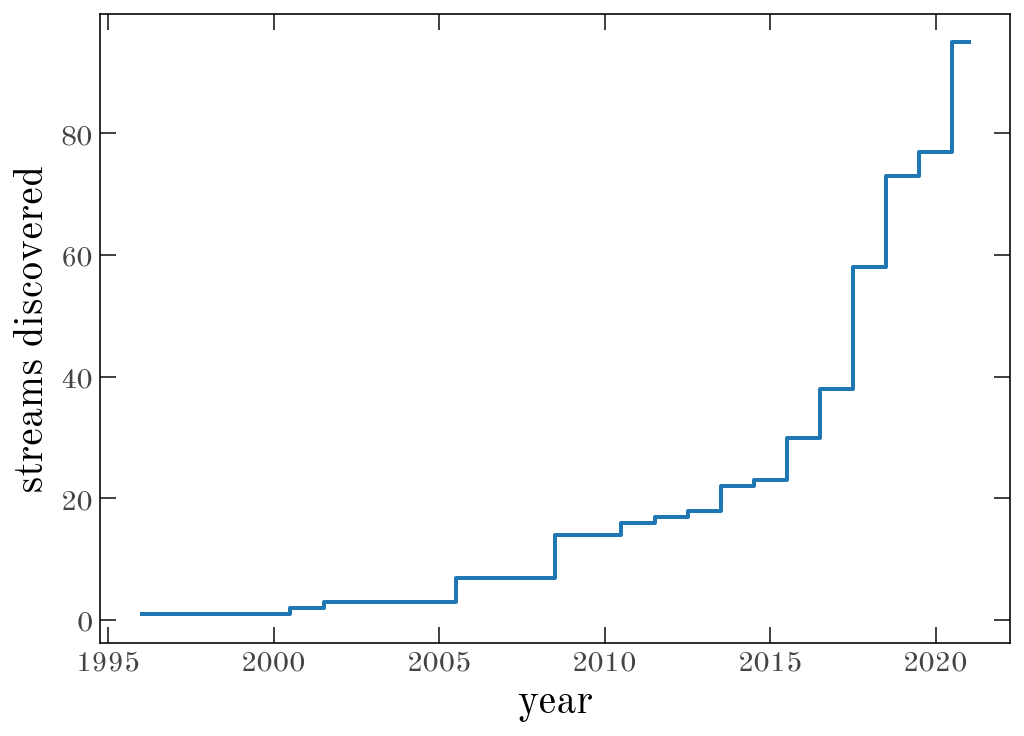

In [55]:
plt.figure(figsize=(7, 5))
plt.plot(year_c, np.cumsum(H), drawstyle="steps-mid", marker="", lw=2, color="tab:blue")
plt.xlabel("year")
plt.ylabel("streams discovered")